# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [2]:
df = pd.read_csv('all_data.csv')
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

# GDP Per Capita

I am also appending information for the GDP per capita for each country to the dataframe. 
This information also came from the [World Bank website](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2015&locations=CL-CN-DE-MX-US-ZW&start=2000) and is stored in the file 'gdp_per_capita.csv'

GDP per capita is the GDP divided by the country's population. It is typically what is used to distinguish between
developed and developing countries.

In [3]:
per_capita = pd.read_csv('gdp_per_capita.csv')
per_capita.columns
per_capita=pd.melt(per_capita, id_vars='﻿Country Name', var_name='Year', value_name='GDP per capita')
per_capita.rename(columns={'﻿Country Name':'Country'}, inplace=True)
per_capita[['Year']] = per_capita[['Year']].astype(int)
per_capita[['Country']]=per_capita['Country'].str.replace('United States', 'United States of America')
per_capita.head()
per_capita.dtypes

Country            object
Year                int64
GDP per capita    float64
dtype: object

In [4]:
df = pd.merge(df, per_capita, how='inner', on=['Country','Year'])
df['Population']=df['GDP']/df['GDP per capita']
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP per capita,Population
0,Chile,2000,77.3,7.786093e+10,5101.368479,1.526275e+07
1,Chile,2001,77.3,7.097992e+10,4595.666327,1.544497e+07
2,Chile,2002,77.8,6.973681e+10,4463.545867,1.562364e+07
3,Chile,2003,77.9,7.564346e+10,4787.699532,1.579954e+07
4,Chile,2004,78.0,9.921039e+10,6210.828325,1.597378e+07


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [5]:
list(df.Country.unique())

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

What years are represented in the data?

In [6]:
list(df.Year.unique())

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [7]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP per capita,Population
0,Chile,2000,77.3,7.786093e+10,5101.368479,1.526275e+07
1,Chile,2001,77.3,7.097992e+10,4595.666327,1.544497e+07
2,Chile,2002,77.8,6.973681e+10,4463.545867,1.562364e+07
3,Chile,2003,77.9,7.564346e+10,4787.699532,1.579954e+07
4,Chile,2004,78.0,9.921039e+10,6210.828325,1.597378e+07


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [8]:
df.rename(columns={'Life expectancy at birth (years)':'LEABY'}, inplace=True)

Run `df.head()` again to check your new column name worked.

In [9]:
df.head()

,Country,Year,LEABY,GDP,GDP per capita,Population
0,Chile,2000,77.3,7.786093e+10,5101.368479,1.526275e+07
1,Chile,2001,77.3,7.097992e+10,4595.666327,1.544497e+07
2,Chile,2002,77.8,6.973681e+10,4463.545867,1.562364e+07
3,Chile,2003,77.9,7.564346e+10,4787.699532,1.579954e+07
4,Chile,2004,78.0,9.921039e+10,6210.828325,1.597378e+07


In [10]:
df['GDP (in trillions)'] = df['GDP']/(10**12)
df['GDP per capita (in thousands)'] = df['GDP per capita']/(10**3)
df['Population (in millions)'] = df['Population']/(10**6)
df.head()

,Country,Year,LEABY,GDP,GDP per capita,Population,GDP (in trillions),GDP per capita (in thousands),Population (in millions)
0,Chile,2000,77.3,7.786093e+10,5101.368479,1.526275e+07,0.077861,5.101368,15.262754
1,Chile,2001,77.3,7.097992e+10,4595.666327,1.544497e+07,0.070980,4.595666,15.444969
2,Chile,2002,77.8,6.973681e+10,4463.545867,1.562364e+07,0.069737,4.463546,15.623635
3,Chile,2003,77.9,7.564346e+10,4787.699532,1.579954e+07,0.075643,4.787700,15.799542
4,Chile,2004,78.0,9.921039e+10,6210.828325,1.597378e+07,0.099210,6.210828,15.973778


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

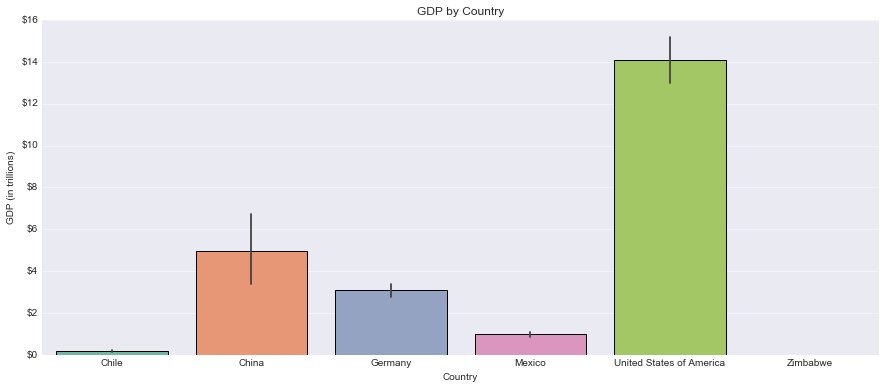

In [11]:
import matplotlib.ticker as mtick

sns.set_style('darkgrid')
sns.set_palette('Set2')

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(
    data=df,
    x='Country',
    y='GDP (in trillions)'
)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.despine()
ax.set_title('GDP by Country')

plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

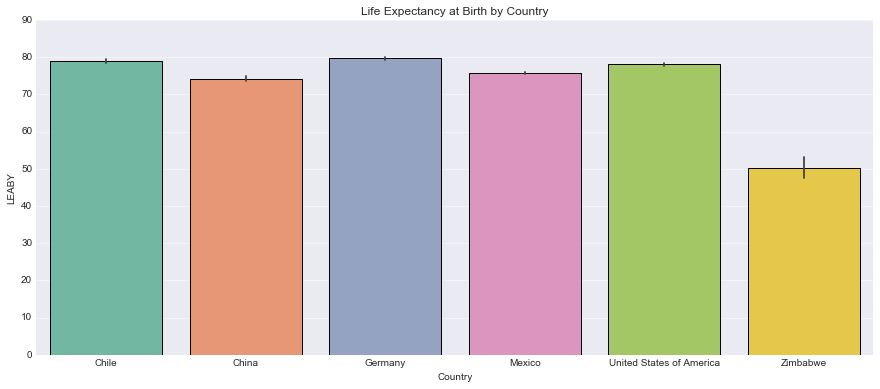

In [12]:
fig, ax2 = plt.subplots(figsize=(15,6))
sns.barplot(
    data=df,
    x='Country',
    y='LEABY',
)
sns.despine()
ax2.set_title('Life Expectancy at Birth by Country')

plt.show()

What do you notice about the two bar charts? Do they look similar?

In [13]:
print("""
The two bar charts are fairly different.

The GDP varies widely from country to country. On the other hand, the average life expectancy at birth is pretty 
consistent across countries (except Zimbabwe).

The U.S. has the largest economy with a GDP of approx. $14 trillion. Followed by China ($5 trillion), Germany 
($3 trillion), Mexico ($1 trillion), Chile ($0.1 trillion) and lastly Zimbabwe (<$0.1 trillion). Additionally, 
the confidence interval appears to be larger with larger economies.

On the other hand, the life expectancy at birth falls in the range of 75-80 years with a narrow confidence interval
for all the countries except Zimbabwe. In Zimbabwe, the life expectancy at birth is 50 years, and a wide confidence
interval indicates that there is higher variability in life expectancy over the years.
""")


The two bar charts are fairly different.

The GDP varies widely from country to country. On the other hand, the average life expectancy at birth is pretty 
consistent across countries (except Zimbabwe).

The U.S. has the largest economy with a GDP of approx. $14 trillion. Followed by China ($5 trillion), Germany 
($3 trillion), Mexico ($1 trillion), Chile ($0.1 trillion) and lastly Zimbabwe (<$0.1 trillion). Additionally, 
the confidence interval appears to be larger with larger economies.

On the other hand, the life expectancy at birth falls in the range of 75-80 years with a narrow confidence interval
for all the countries except Zimbabwe. In Zimbabwe, the life expectancy at birth is 50 years, and a wide confidence
interval indicates that there is higher variability in life expectancy over the years.



## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

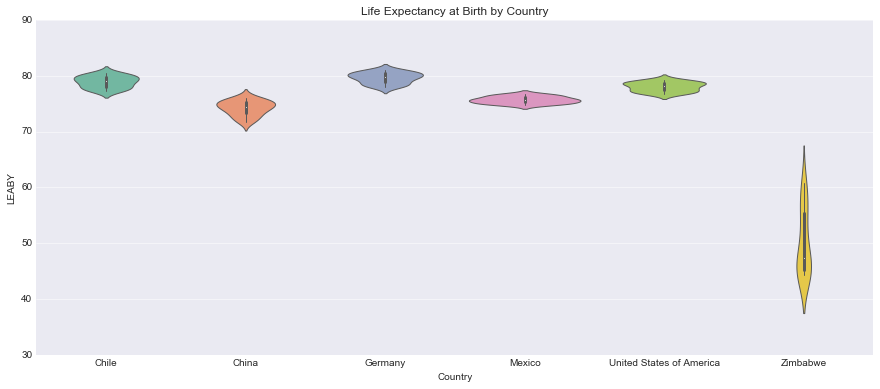

In [14]:
fig, ax2 = plt.subplots(figsize=(15,6))
sns.violinplot(
    data=df,
    x='Country',
    y='LEABY'
)
sns.despine()
ax2.set_title('Life Expectancy at Birth by Country')

plt.show()
fig.savefig('LEABY_Violin.png')

What do you notice about this distribution? Which country's life expactancy has changed the most?

In [15]:
print("""These distributions confirm that life expectancy has been fairly consistent, but gradually improving
over time (with the exception of Zimbabwe, but more on that later.) Some minor variations in the more consistent
countries are that Mexico's life expectancy is particularly stagnant (concentrated at median values) and China began
at a lower bench mark, but experienced relatively more growth.

Zimbabwe, on the other hand, has seen dramatic change in life expectancy over the last 15 years.
""")

These distributions confirm that life expectancy has been fairly consistent, but gradually improving
over time (with the exception of Zimbabwe, but more on that later.) Some minor variations in the more consistent
countries are that Mexico's life expectancy is particularly stagnant (concentrated at median values) and China began
at a lower bench mark, but experienced relatively more growth.

Zimbabwe, on the other hand, has seen dramatic change in life expectancy over the last 15 years.



## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


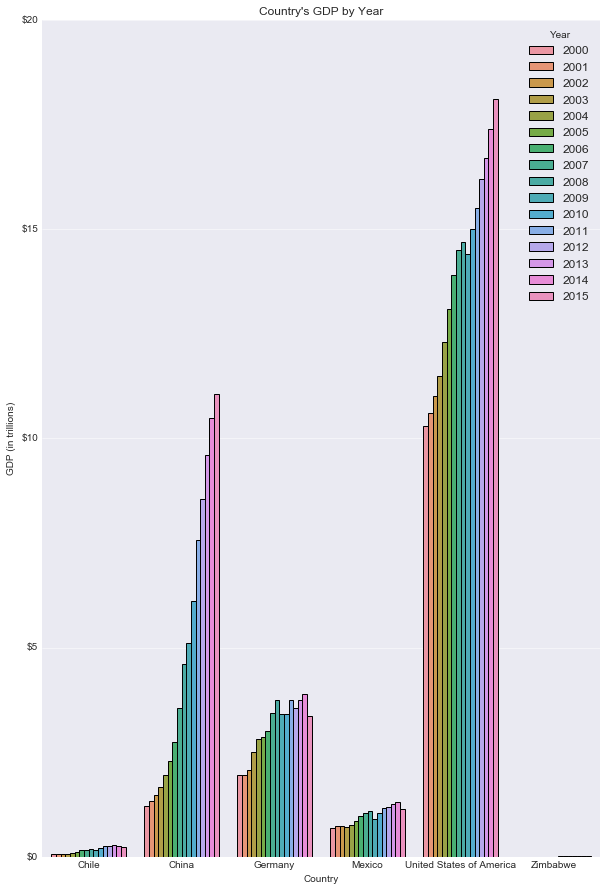

In [16]:
f, ax = plt.subplots(figsize=(10, 15)) 

ax = sns.barplot(
    data= df,
    x="Country",
    y="GDP (in trillions)",
    hue="Year"
)

ax.yaxis.set_major_formatter(tick)
ax.set_title("Country's GDP by Year")

plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


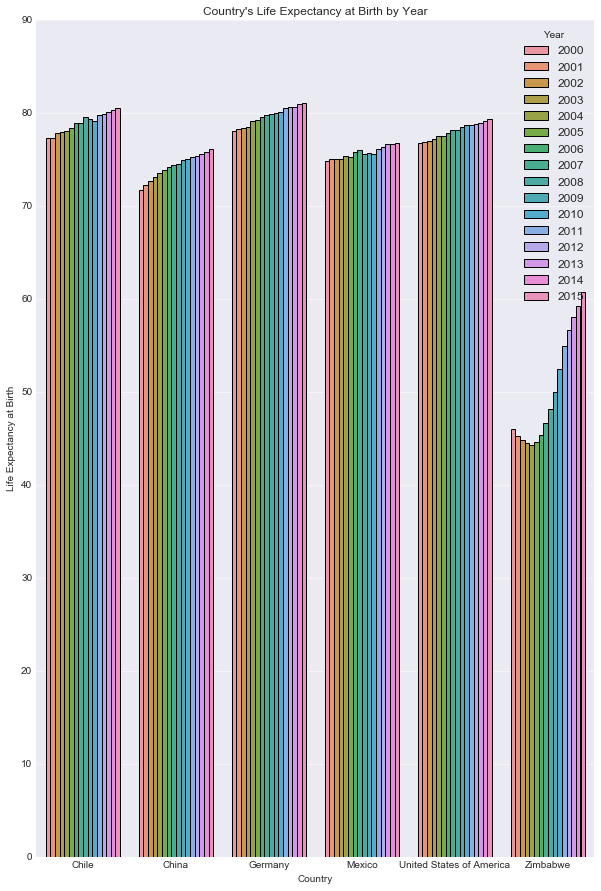

In [17]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(
    data= df,
    x="Country",
    y="LEABY",
    hue="Year"
)

ax.set(ylabel="Life Expectancy at Birth")
ax.set_title("Country's Life Expectancy at Birth by Year")

plt.show()


What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

In [18]:
print("""
For GDP, China's bars changed the most. For LEABY, Zimbabwe's bars changed the most.

The biggest changes in data appeared to occur in the years: 2010-2012 for China and U.S.'s GDPs, 2008-2010 
for Zimbabwe's LEABY.

It's difficult to tell percent year-over-year change within a country within these charts. But relatively speaking,
Mexico, Chile and Zimbabwe demonstrated little change in GDP.

It's hard to make a case for GDPs impact on LEABY. Even though Chile's economy is much smaller than the U.S., Mexico,
or China, it's life expectancy is much higher and resembles a more developed nation like Germany. Furthermore, the 
trends in GDP are not necessarily reflected in the LEABY trends. Even though China's economy grew exponentially in 
the years 2000-2015, the life expextancy changed at relatively the same pace as other developed nations. 
Additionally, even though Zimbabwe's economy remained relatively the same size, it experienced tremendous 
improvements in LEABY. This seems to indicate that LEABY is determined by other factors within each country.
""")


For GDP, China's bars changed the most. For LEABY, Zimbabwe's bars changed the most.

The biggest changes in data appeared to occur in the years: 2010-2012 for China and U.S.'s GDPs, 2008-2010 
for Zimbabwe's LEABY.

It's difficult to tell percent year-over-year change within a country within these charts. But relatively speaking,
Mexico, Chile and Zimbabwe demonstrated little change in GDP.

It's hard to make a case for GDPs impact on LEABY. Even though Chile's economy is much smaller than the U.S., Mexico,
or China, it's life expectancy is much higher and resembles a more developed nation like Germany. Furthermore, the 
trends in GDP are not necessarily reflected in the LEABY trends. Even though China's economy grew exponentially in 
the years 2000-2015, the life expextancy changed at relatively the same pace as other developed nations. 
Additionally, even though Zimbabwe's economy remained relatively the same size, it experienced tremendous 
improvements in LEABY. This seems to ind

In [19]:
import statsmodels.api as sm
country_dummies = pd.get_dummies(df['Country'])
#year_dummies = pd.get_dummies(df['Year'])
df_test = pd.concat([df, country_dummies], axis=1)
#df_test = pd.concat([df_test, year_dummies], axis=1)
df_test['Year*GDP'] = df_test['Year']*df_test['GDP (in trillions)']

#X = df_test[["GDP (in trillions)"]+list(year_dummies.columns)[1:]+list(country_dummies.columns)[1:]]
#X = df_test[["GDP","Year"]+list(country_dummies.columns)[1:]]
X = df_test[["Year","GDP (in trillions)","Year*GDP"]+list(country_dummies.columns)[1:]]
y = df_test["LEABY"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LEABY   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     371.0
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           8.48e-64
Time:                        17:02:30   Log-Likelihood:                -192.20
No. Observations:                  96   AIC:                             402.4
Df Residuals:                      87   BIC:                             425.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                     -854.8451    110.056     -7.767      0.000     -1073.593  -636.097
Year                         0.4652      0.055      8.484      0.000         0.356     0.574
GDP (in trillions)          38.1340     23.812      1.601      0.113        -9.194    85.462
Year*GDP                    -0.0191      0.012     -1.618      0.109        -0.042     0.004
China                       -3.7275      1.108     -3.364      0.001        -5.930    -1.525
Germany                      1.1671      0.892      1.309      0.194        -0.605     2.940
Mexico                      -3.1015      0.685     -4.525      0.000        -4.464    -1.739
United States of America     1.2669      2.905      0.436      0.664        -4.508     7.042
Zimbabwe                   -28.8785      0.666    -43.354      0.000       -30.202   -27.555
==============================================================================
Omnibus:                       27.103   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.354
Skew:                           0.951   Prob(JB):                     3.20e-16
Kurtosis:                       6.771   Cond. No.                     7.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print("""I was trying to see here if GDP had a statistically significant impact on LEABY after controlling for year
and country. However, I think these results should be taken with a grain of salt because I am sure there are
more accurate ways to model time-series data. (Should the years have been treated as dummies?) That being said,
this model shows that GDP does not have a statistically signigicant impact (the p-value is >0.1) on life 
expectancy at birth. Year and country of origin (for China, Mexico and Zimbabwe at least) are statistically 
different. Note that our reference or baseline country was Chile: this means U.S. and Germany's LEABY is *not* 
statistically different from Chile after controlling for these other variables.
    """)

I was trying to see here if GDP had a statistically significant impact on LEABY after controlling for year
and country. However, I think these results should be taken with a grain of salt because I am sure there are
more accurate ways to model time-series data. (Should the years have been treated as dummies?) That being said,
this model shows that GDP does not have a statistically signigicant impact (the p-value is >0.1) on life 
expectancy at birth. Year and country of origin (for China, Mexico and Zimbabwe at least) are statistically 
different. Note that our reference or baseline country was Chile: this means U.S. and Germany's LEABY is *not* 
statistically different from Chile after controlling for these other variables.
    


In [21]:
df_test['Year*GDP per capita'] = df_test['Year']*df_test['GDP per capita (in thousands)']

X = df_test[["Year","GDP per capita (in thousands)","Year*GDP per capita"]+list(country_dummies.columns)[1:]]
y = df_test["LEABY"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LEABY   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           8.38e-66
Time:                        17:02:30   Log-Likelihood:                -187.09
No. Observations:                  96   AIC:                             392.2
Df Residuals:                      87   BIC:                             415.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                         -1056.9813    122.887     -8.601      0.000     -1301.233  -812.730
Year                              0.5666      0.061      9.230      0.000         0.445     0.689
GDP per capita (in thousands)    11.8985      6.202      1.918      0.058        -0.429    24.226
Year*GDP per capita              -0.0060      0.003     -1.958      0.053        -0.012  8.99e-05
China                            -5.6132      0.809     -6.941      0.000        -7.221    -4.006
Germany                           4.6886      2.319      2.022      0.046         0.079     9.298
Mexico                           -3.4973      0.638     -5.485      0.000        -4.765    -2.230
United States of America          4.2343      3.000      1.411      0.162        -1.729    10.198
Zimbabwe                        -30.2688      0.968    -31.262      0.000       -32.193   -28.344
==============================================================================
Omnibus:                       20.903   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.723
Skew:                           0.779   Prob(JB):                     1.18e-10
Kurtosis:                       6.001   Cond. No.                     3.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print("""Again, I think these results should be taken with a grain of salt because I am sure there are
more accurate ways to model time-series data.

That being said, this model shows that GDP per capita *IS* a statistically significant predictor of life expectancy
at birth. BOTH "GDP per capita" and the interaction term of "Year*GDP per capita" are staistically significant at 
<0.1 level. 

As you can see, the coefficient for GDP per capita is positive, meaning that with increases in GDP is 
correlated with life expectancy. a.k.a. When we see increases in GDP we can expect to see increases in LEABY.
However, the interaction term between year and GDP per capita is negative, meaning that with each year, GDP per 
capita has a diminishing return on LEABY. Although this negative value is statistically significant, take note of 
its small magnitude.
    """)

Again, I think these results should be taken with a grain of salt because I am sure there are
more accurate ways to model time-series data.

That being said, this model shows that GDP per capita *IS* a statistically significant predictor of life expectancy
at birth. BOTH "GDP per capita" and the interaction term of "Year*GDP per capita" are staistically significant at 
<0.1 level. 

As you can see, the coefficient for GDP per capita is positive, meaning that with increases in GDP is 
correlated with life expectancy. a.k.a. When we see increases in GDP we can expect to see increases in LEABY.
However, the interaction term between year and GDP per capita is negative, meaning that with each year, GDP per 
capita has a diminishing return on LEABY. Although this negative value is statistically significant, take note of 
its small magnitude.
    


Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


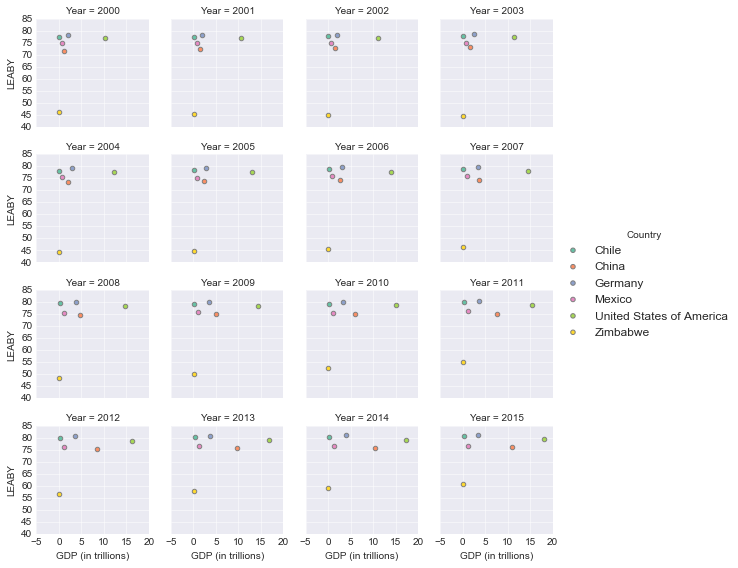

In [23]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
# g = sns.FacetGrid(_____NAME_OF_DATAFRAME_________, col=_______COLUMN_______, hue=________DIFFERENTIATOR________, col_wrap=4, size=2)
# g = (g.map(______MATPLOTLIB_FUNCTION______, ______X_DATA______, ______Y_DATA______, edgecolor="w").add_legend())
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, size=2)
g = (g.map(plt.scatter, 'GDP (in trillions)', 'LEABY', edgecolor="gray").add_legend())
g.savefig('Scatter_LEABYvGDP.png')

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

In [24]:
print("""
China moves the most along the X axis (GDP). Zimbabwe moves the most along the Y axis (LEABY).
Give the analysis we've done in the earlier steps (and outside knowledge), these results are not surprising
becuase China and Zimbabwe demonstrated the widest distributions in their respective categories.
""")


China moves the most along the X axis (GDP). Zimbabwe moves the most along the Y axis (LEABY).
Give the analysis we've done in the earlier steps (and outside knowledge), these results are not surprising
becuase China and Zimbabwe demonstrated the widest distributions in their respective categories.



## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



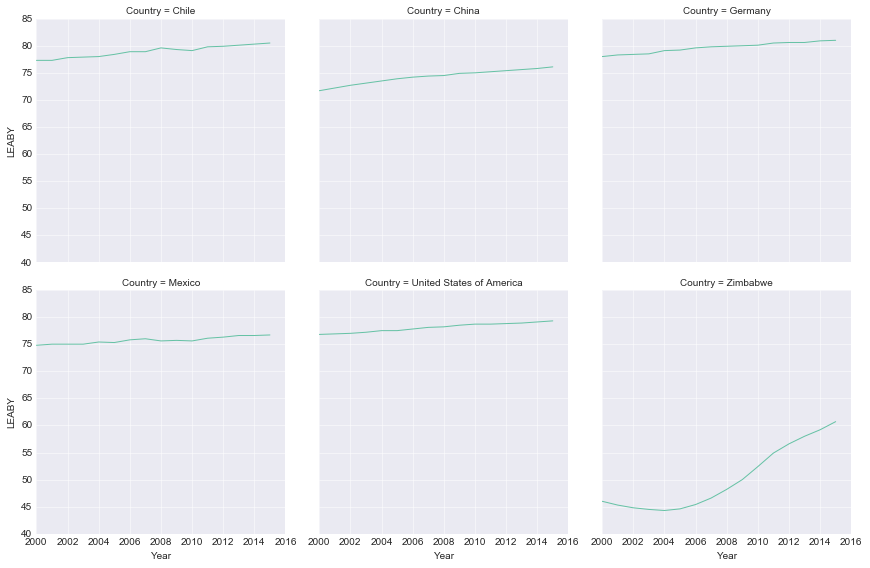

In [25]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Uncomment the code below and fill in the blanks
# g3 = sns.FacetGrid(df, col="__________", col_wrap=3, size=4)
# g3 = (g3.map(__plot___, "___x__", "___y___").add_legend())
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
g3.savefig('Line_LEABY.png')

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

In [26]:
print("""
Zimbabwe's line changed the most dramatically. The largest changes (for Zimbabwe) occured in the years 2006-2012 and
are still continuing.

Mexico had the smallest amount of change in LEABY over the years.
""")


Zimbabwe's line changed the most dramatically. The largest changes (for Zimbabwe) occured in the years 2006-2012 and
are still continuing.

Mexico had the smallest amount of change in LEABY over the years.



## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


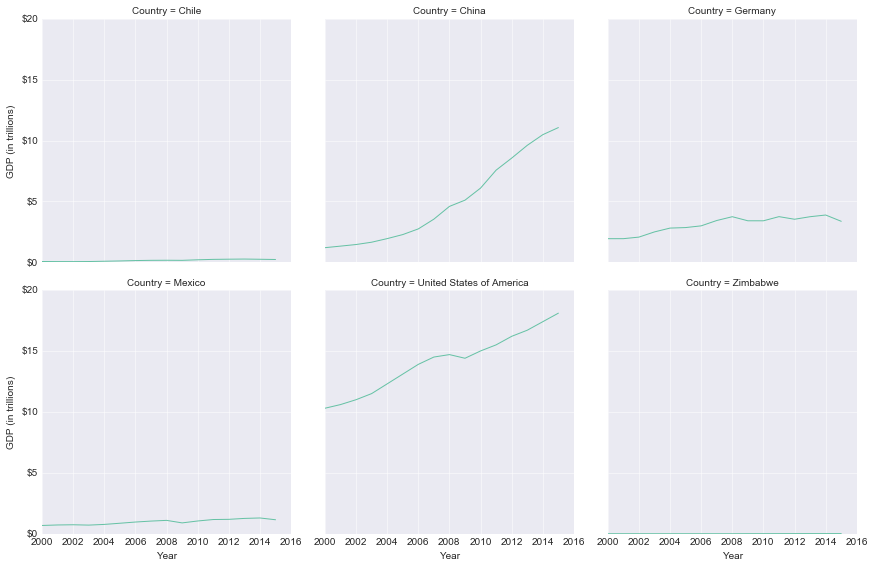

In [27]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "GDP (in trillions)").add_legend()
      .set(yticklabels=["${}".format(5*i) for i in range(5)]))
g3.savefig('Line_GDP.png')

Which countries have the highest and lowest GDP?

In [28]:
print("""
The U.S. has the highest GDP. Zimbabwe has the lowest GDP.
""")


The U.S. has the highest GDP. Zimbabwe has the lowest GDP.



Which countries have the highest and lowest life expectancy?

In [29]:
print("""
The Germany has the highest life expectancy. Zimbabwe has the lowest life expectancy.
""")


The Germany has the highest life expectancy. Zimbabwe has the lowest life expectancy.



## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??

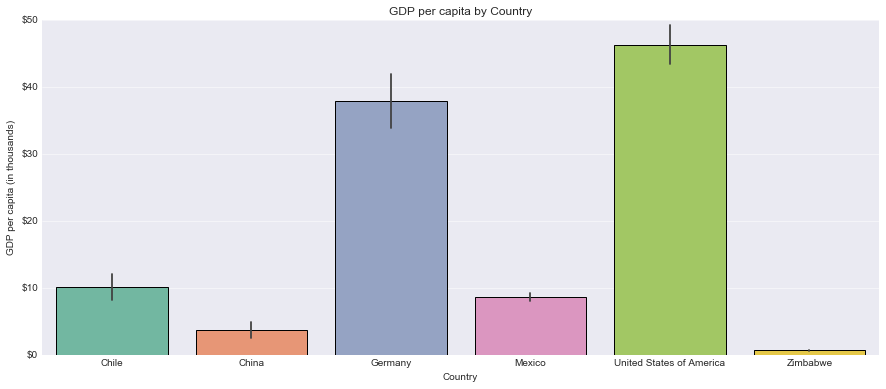

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(
    data=df,
    x='Country',
    y='GDP per capita (in thousands)'
)

ax.yaxis.set_major_formatter(tick)

sns.despine()
ax.set_title('GDP per capita by Country')

plt.show()

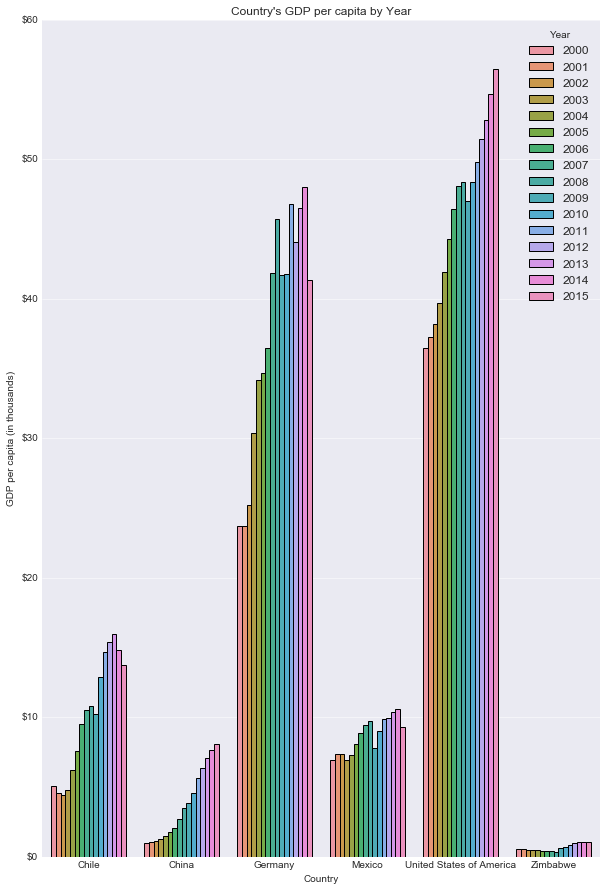

In [31]:
f, ax = plt.subplots(figsize=(10, 15)) 

ax = sns.barplot(
    data= df,
    x="Country",
    y="GDP per capita (in thousands)",
    hue="Year"
)

ax.yaxis.set_major_formatter(tick)
ax.set_title("Country's GDP per capita by Year")

plt.show()

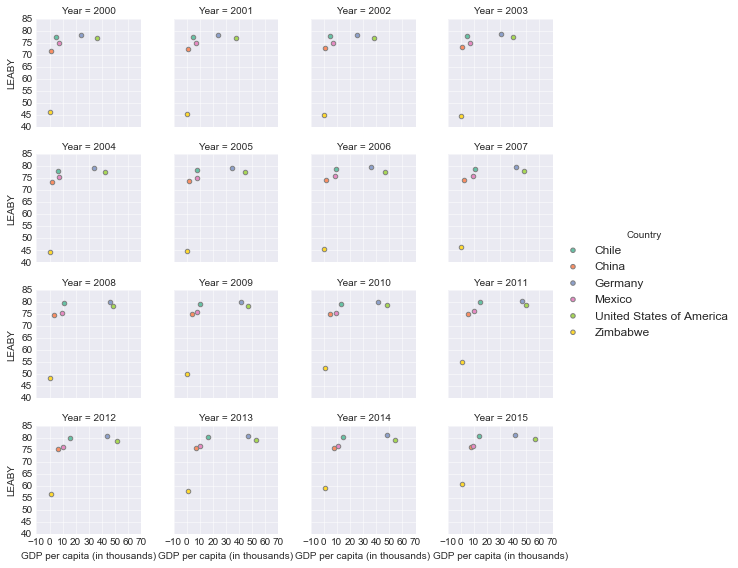

In [32]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
# g = sns.FacetGrid(_____NAME_OF_DATAFRAME_________, col=_______COLUMN_______, hue=________DIFFERENTIATOR________, col_wrap=4, size=2)
# g = (g.map(______MATPLOTLIB_FUNCTION______, ______X_DATA______, ______Y_DATA______, edgecolor="w").add_legend())
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, size=2)
g = (g.map(plt.scatter, 'GDP per capita (in thousands)', 'LEABY', edgecolor="gray").add_legend())
g.savefig('Scatter_LEABYvGDPcapita.png')

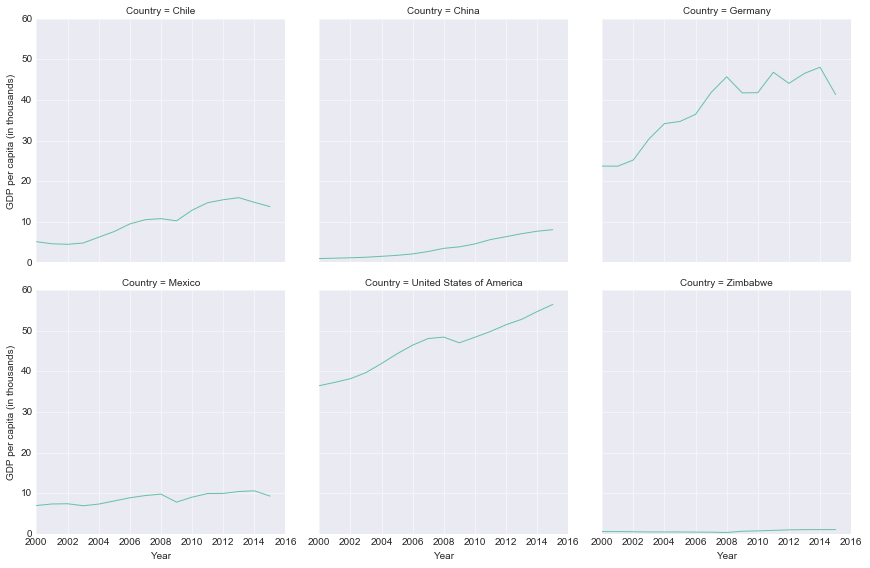

In [33]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = g3.map(plt.plot, "Year", "GDP per capita (in thousands)").add_legend()
g3.savefig('Line_GDPcapita.png')

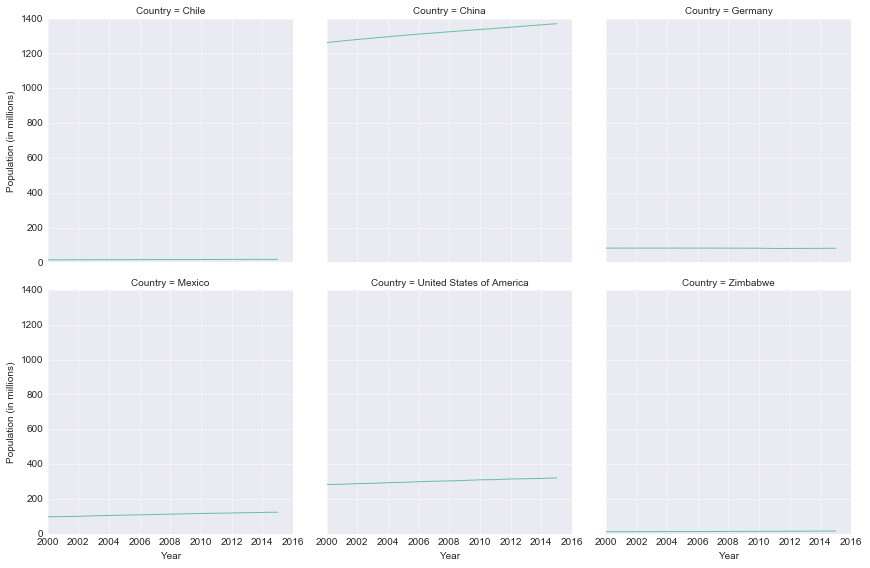

In [34]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "Population (in millions)").add_legend())
g3.savefig('Line_Population.png')